In [1]:
pip install pycocotools


   ---------------------------------------- 0.0/83.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/83.3 kB ? eta -:--:--
   -------------- ------------------------- 30.7/83.3 kB 262.6 kB/s eta 0:00:01
   ------------------------ --------------- 51.2/83.3 kB 375.8 kB/s eta 0:00:01
   ---------------------------------------- 83.3/83.3 kB 521.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
pip install opencv-python



SyntaxError: invalid syntax (556306433.py, line 1)

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


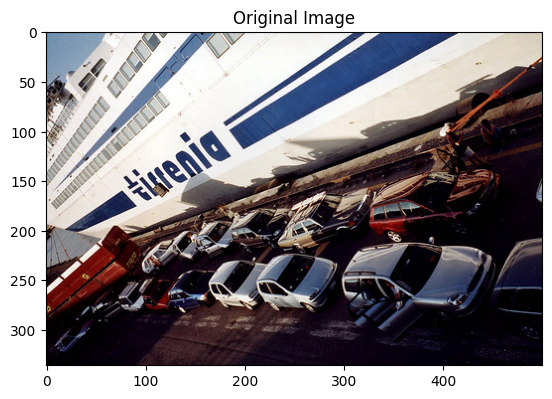

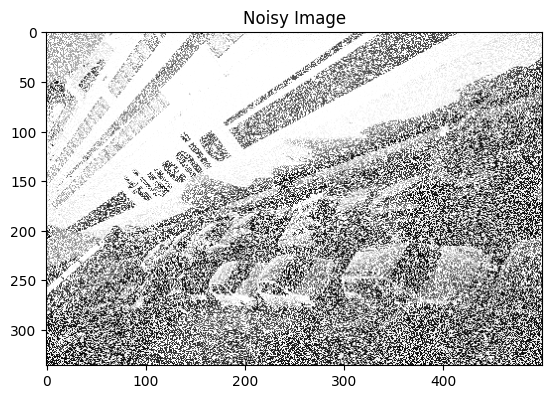

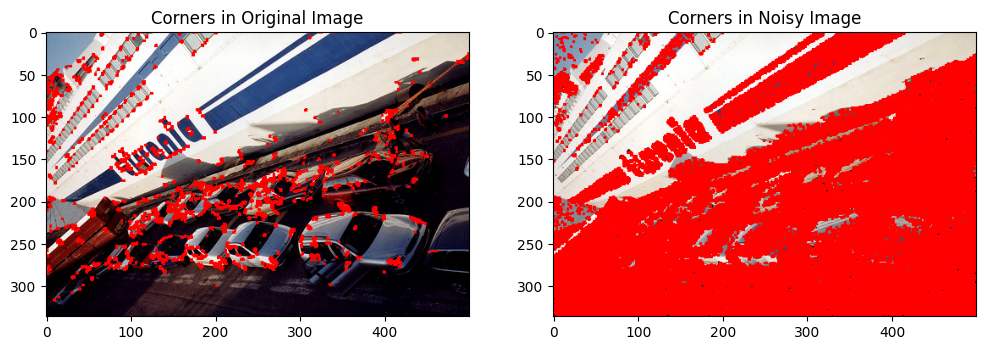

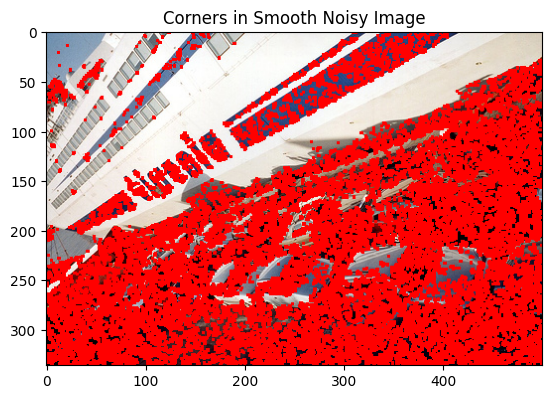

In [7]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2

coco = COCO('annotations/instances_val2017.json') 

categories = coco.getCatIds(catNms=['car', 'lion', 'boat'])
imageIds = coco.getImgIds(catIds=categories)
imageData = coco.loadImgs(imageIds[8])[0]

imgResponse = requests.get(imageData['coco_url'])
imgArr = np.asarray(bytearray(imgResponse.content), dtype=np.uint8)
image = cv2.imdecode(imgArr, cv2.IMREAD_COLOR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Gaussian noise
mean = 0
sigma = 25
gau_noise = np.random.normal(mean, sigma, gray_image.shape).astype(np.uint8)

# Add noise
noisy_image = cv2.add(gray_image, gau_noise)

# Display noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.show()

# Harris on original
corners_original = cv2.cornerHarris(np.float32(gray_image), blockSize=2, ksize=3, k=0.04)

# Harris on noisy
corners_noisy = cv2.cornerHarris(np.float32(noisy_image), blockSize=2, ksize=3, k=0.04)

# make corners more visible
corners_original_dilated = cv2.dilate(corners_original, None)
corners_noisy_dilated = cv2.dilate(corners_noisy, None)

image_with_corners_original = image.copy()
image_with_corners_original[corners_original_dilated > 0.01 * corners_original_dilated.max()] = [0, 0, 255]

image_with_corners_noisy = image.copy()
image_with_corners_noisy[corners_noisy_dilated > 0.01 * corners_noisy_dilated.max()] = [0, 0, 255]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_with_corners_original, cv2.COLOR_BGR2RGB))
plt.title("Corners in Original Image")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_corners_noisy, cv2.COLOR_BGR2RGB))
plt.title("Corners in Noisy Image")
plt.show()

# reduce noise
smoothed_noisy_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

#Harris on smoothed noisy image
corners_smoothed = cv2.cornerHarris(np.float32(smoothed_noisy_image), blockSize=2, ksize=3, k=0.04)

# mark corners on the smoothed image
corners_smoothed_dilated = cv2.dilate(corners_smoothed, None)
image_with_corners_smoothed = image.copy()
image_with_corners_smoothed[corners_smoothed_dilated > 0.01 * corners_smoothed_dilated.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(image_with_corners_smoothed, cv2.COLOR_BGR2RGB))
plt.title("Corners in Smooth Noisy Image")
plt.show()

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


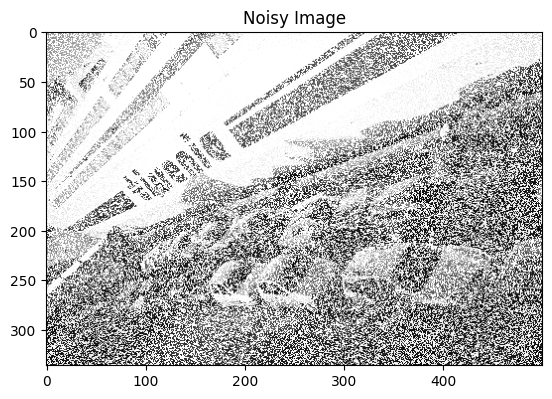

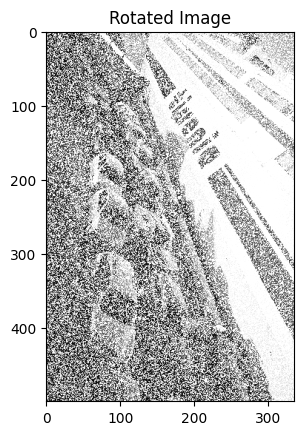

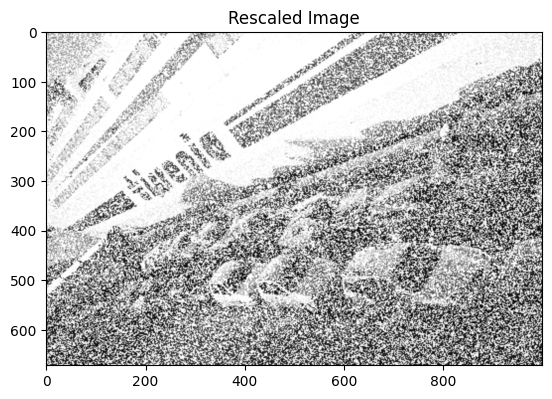

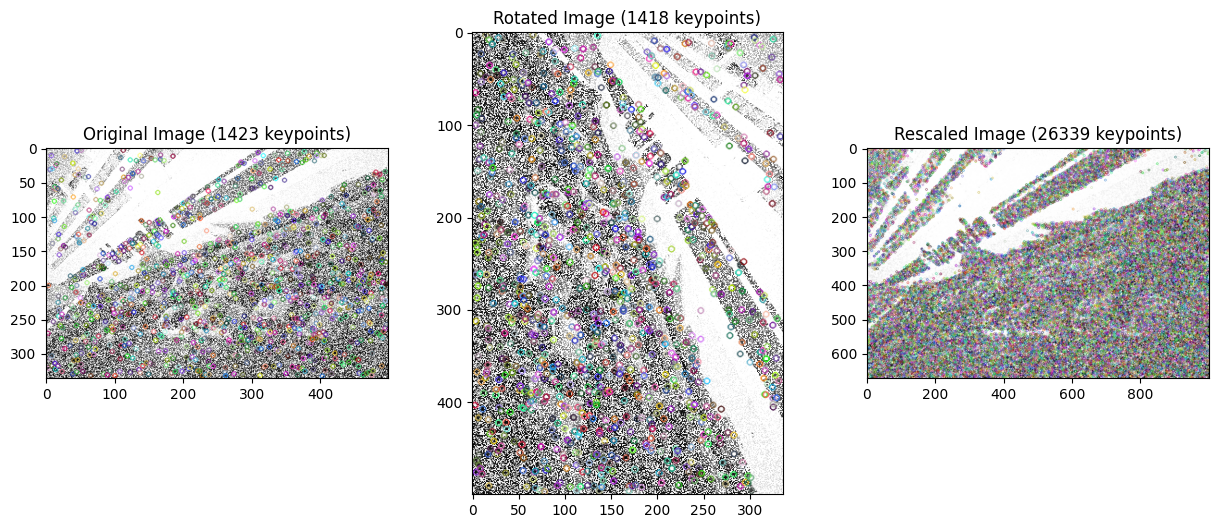

Consistent keypoints -> original vs rotated 1335
Consistent keypoints -> original vs rescaled 1036


In [12]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2
coco = COCO('annotations/instances_val2017.json') 

categories = coco.getCatIds(catNms=['car', 'lion', 'boat'])
imageIds = coco.getImgIds(catIds=categories)
imageData = coco.loadImgs(imageIds[8])[0]

imgResponse = requests.get(imageData['coco_url'])
imgArr = np.asarray(bytearray(imgResponse.content), dtype=np.uint8)
image = cv2.imdecode(imgArr, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian noise
mean = 0
sigma = 25
gau_noise = np.random.normal(mean, sigma, gray_image.shape).astype(np.uint8)

# Add noise
noisy_image = cv2.add(gray_image, gau_noise)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.show()

rotated_image = cv2.rotate(noisy_image, cv2.ROTATE_90_CLOCKWISE)
rescaled_image = cv2.resize(noisy_image, None, fx=2, fy=scale_factor)

# Display the rotated and rescaled images
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image")
plt.show()
plt.imshow(rescaled_image, cmap='gray')
plt.title("Rescaled Image")
plt.show()

sift = cv2.SIFT_create()

# Extract SIFT keypoints
originalKeyP, descriptors_original = sift.detectAndCompute(noisy_image, None)
rotateKeyP, descriptors_rotated = sift.detectAndCompute(rotated_image, None)
rescaleKeyP, descriptors_rescaled = sift.detectAndCompute(rescaled_image, None)

image_with_originalKeyP = cv2.drawKeypoints(noisy_image, originalKeyP, None)
image_with_rotateKeyP = cv2.drawKeypoints(rotated_image, rotateKeyP, None)
image_with_rescaleKeyP = cv2.drawKeypoints(rescaled_image, rescaleKeyP, None)

# Display keypoints
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_with_originalKeyP, cmap='gray')
plt.title(f"Original Image ({len(originalKeyP)} keypoints)")
plt.subplot(1, 3, 2)
plt.imshow(image_with_rotateKeyP, cmap='gray')
plt.title(f"Rotated Image ({len(rotateKeyP)} keypoints)")
plt.subplot(1, 3, 3)
plt.imshow(image_with_rescaleKeyP, cmap='gray')
plt.title(f"Rescaled Image ({len(rescaleKeyP)} keypoints)")

plt.show()

# FLANN-based matcher
FLANN_INDEX_KDTREE = 1
indexParams = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
searchParams = dict(checks=50)
flann = cv2.FlannBasedMatcher(indexParams, searchParams)

# Match descrip original vs rotated
matchRotate = flann.knnMatch(descriptors_original, descriptors_rotated, k=2)
matchRescale = flann.knnMatch(descriptors_original, descriptors_rescaled, k=2)

# find common matches
common_matchRotate = []
for m, n in matchRotate:
    if m.distance < 0.7 * n.distance:
        common_matchRotate.append(m)

common_matchesRescale = []
for m, n in matchRescale:
    if m.distance < 0.7 * n.distance:
        common_matchesRescale.append(m)

print(f"Consistent keypoints -> original vs rotated {len(common_matchRotate)}")
print(f"Consistent keypoints -> original vs rescaled {len(common_matchesRescale)}")

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


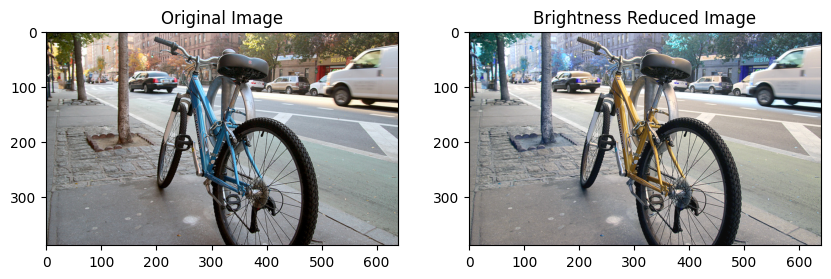

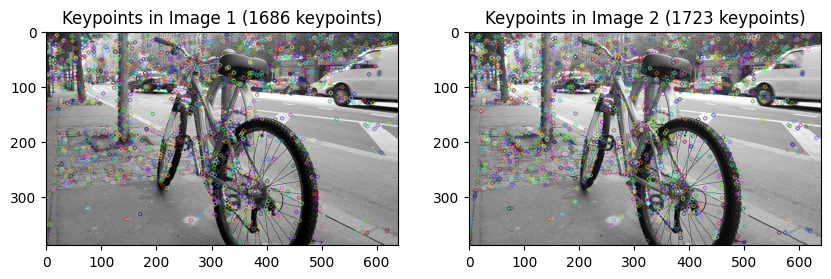

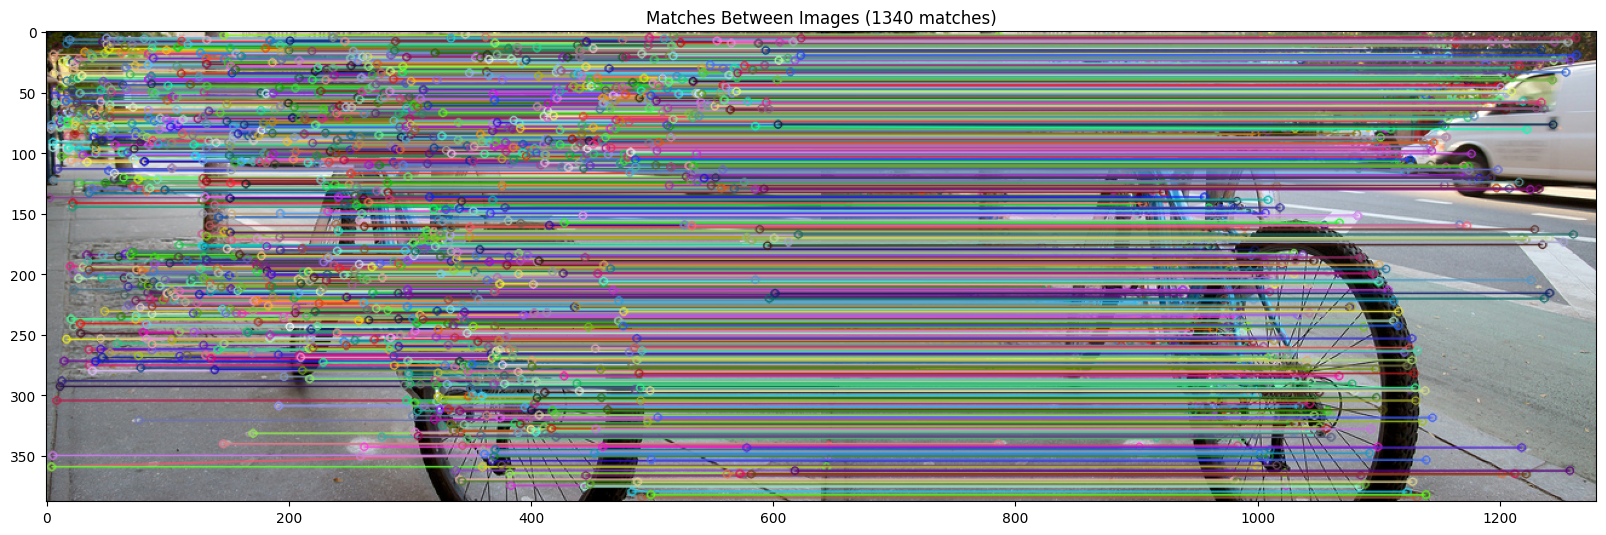

In [22]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2
coco = COCO('annotations/instances_val2017.json')

categories = coco.getCatIds(catNms=['lion'])
imageIds = coco.getImgIds(catIds=categories)

imageInfo_1 = coco.loadImgs(imageIds[4])[0]
imageInfo_2 = coco.loadImgs(imageIds[4])[0]

# get images using URLs
response = requests.get(imageInfo_1['coco_url'])
imgArr = np.asarray(bytearray(response.content), dtype=np.uint8)
image_1= cv2.imdecode(imgArr, cv2.IMREAD_COLOR)

response = requests.get(imageInfo_2['coco_url'])
imgArr = np.asarray(bytearray(response.content), dtype=np.uint8)
image_2= cv2.imdecode(imgArr, cv2.IMREAD_COLOR)


rgbImage = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

brightness_value = 10
brighter_image = cv2.convertScaleAbs(rgbImage, beta=brightness_value)


# Convert the images to grayscale
grayImage_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
grayImage_2 = cv2.cvtColor(brighter_image, cv2.COLOR_BGR2GRAY)

# Display the two images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(brighter_image, cv2.COLOR_BGR2RGB))
plt.title("Brightness Reduced Image")
plt.show()

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(grayImage_1, None)
keypoints2, descriptors2 = sift.detectAndCompute(grayImage_2, None)

# Draw keypoints on both images
image_with_keypoints1 = cv2.drawKeypoints(grayImage_1, keypoints1, None)
image_with_keypoints2 = cv2.drawKeypoints(grayImage_2, keypoints2, None)

# Display images with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_with_keypoints1, cmap='gray')
plt.title(f"Keypoints in Image 1 ({len(keypoints1)} keypoints)")
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints2, cmap='gray')
plt.title(f"Keypoints in Image 2 ({len(keypoints2)} keypoints)")
plt.show()

# FLANN parameters
FLANN_INDEX_KDTREE = 1
indexParams = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
searchParams = dict(checks=50)  # Higher value for more precision

# Initialize FLANN-based matcher
flann = cv2.FlannBasedMatcher(indexParams, searchParams)

# Match descriptors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

#  filter good matches
commonMatches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        commonMatches.append(m)

# Draw good matches
matched_image = cv2.drawMatches(image_1, keypoints1, image_2, keypoints2, commonMatches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matched keypoints
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title(f"Matches Between Images ({len(commonMatches)} matches)")
plt.show()

In [29]:
from pycocotools.coco import COCO
import requests
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

coco = COCO('annotations/instances_val2017.json')

categories = ['car', 'bus', 'boat']
cat_ids = coco.getCatIds(catNms=categories)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Function to extract global feature vector (mean, variance, min, max) from an image
def extract_global_feature_vector(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    if descriptors is None:  # Handle cases with no descriptors
        return np.zeros(128 * 4)
    mean = np.mean(descriptors, axis=0)
    variance = np.var(descriptors, axis=0)
    min_val = np.min(descriptors, axis=0)
    max_val = np.max(descriptors, axis=0)
    return np.concatenate([mean, variance, min_val, max_val])

# Prepare the dataset
X = []  # for Feature vectors
y = []  # for Labels

# Loop through each category and get images
for category in categories:
    category_id = coco.getCatIds(catNms=[category])[0]
    img_ids = coco.getImgIds(catIds=[category_id])
    
    for img_id in img_ids[:25]:
        img_info = coco.loadImgs(img_id)[0]
        response = requests.get(img_info['coco_url'])
        imgArr = np.asarray(bytearray(response.content), dtype=np.uint8)
        image= cv2.imdecode(imgArr, cv2.IMREAD_COLOR) 
        
        # Extract the global feature vector
        global_feature_vector = extract_global_feature_vector(image)
        
        # Add the feature vector and label to the dataset
        X.append(global_feature_vector)
        y.append(category)  # Label corresponds to the object category

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode the labels -> values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

accuracyKNN = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracyKNN * 100:.2f}%")

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!
Classification Accuracy: 30.43%


kNN Classification Accuracy: 30.43%
Logistic Regression Accuracy: 34.78%


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


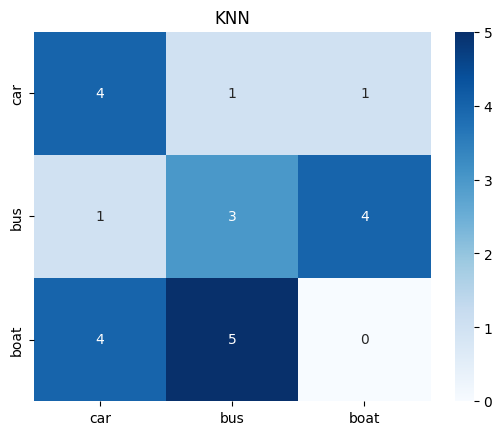

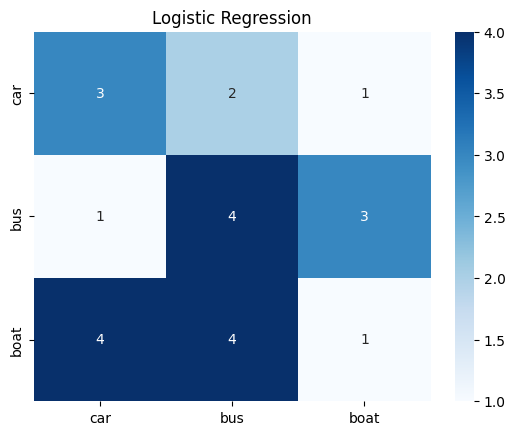

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

# Initialize and train the log res
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_log_reg = log_reg.predict(X_test)

accuracyLR = accuracy_score(y_test, y_pred_log_reg)

print(f"kNN Classification Accuracy: {accuracyKNN * 100:.2f}%")
print(f"Logistic Regression Accuracy: {accuracyLR * 100:.2f}%")

confusionKNN = confusion_matrix(y_test, y_pred)
confusionLOG = confusion_matrix(y_test, y_pred_log_reg)

sb.heatmap(confusionKNN, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('KNN')
plt.show()

sb.heatmap(confusionLOG, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Logistic Regression')
plt.show()

In [ ]:
from pycocotools.coco import COCO
import requests
import matplotlib.pyplot as plt
import cv2
import numpy as np
coco = COCO('annotations/instances_val2017.json')

cat_ids = coco.getCatIds(catNms=['car'])
img_ids = coco.getImgIds(catIds=cat_ids)

# Load two images of the same object (car) from different perspectives
imageInfo_1 = coco.loadImgs(img_ids[4])[0]
imageInfo_2 = coco.loadImgs(img_ids[4])[0]

response = requests.get(imageInfo_1['coco_url'])
imgArr = np.asarray(bytearray(response.content), dtype=np.uint8)
image_1= cv2.imdecode(imgArr, cv2.IMREAD_COLOR)

response = requests.get(imageInfo_2['coco_url'])
imgArr = np.asarray(bytearray(response.content), dtype=np.uint8)
image_2= cv2.imdecode(imgArr, cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

brightness_value = 10
brightImg = cv2.convertScaleAbs(image_rgb, beta=brightness_value)

# Convert to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(brightImg, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

#  FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# filter common matches
common_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        common_matches.append(m)

# Extract matched descriptors
matched_descriptors1 = np.array([descriptors1[m.queryIdx] for m in common_matches])
matched_descriptors2 = np.array([descriptors2[m.trainIdx] for m in common_matches])

print(f"Number of good matches: {len(common_matches)}")

# Image 1
mean1 = np.mean(matched_descriptors1, axis=0)
variance1 = np.var(matched_descriptors1, axis=0)
min1 = np.min(matched_descriptors1, axis=0)
max1 = np.max(matched_descriptors1, axis=0)

# Image 2
mean2 = np.mean(matched_descriptors2, axis=0)
variance2 = np.var(matched_descriptors2, axis=0)
min2 = np.min(matched_descriptors2, axis=0)
max2 = np.max(matched_descriptors2, axis=0)

# feature vectors for Images
global_feature_vector1 = np.concatenate([mean1, variance1, min1, max1])
global_feature_vector2 = np.concatenate([mean2, variance2, min2, max2])

print(f"Global feature vector for Image 1 (size: {global_feature_vector1.shape}):")
print(global_feature_vector1)

print(f"Global feature vector for Image 2 (size: {global_feature_vector2.shape}):")
print(global_feature_vector2)